In [1]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import math
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
zip_path = '../BD/Supermercado_mod.zip' 
csv_filename = 'Supermercado_mod.csv'

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(csv_filename) as f:
        df = pd.read_csv(f)

### DB-SCAN

In [3]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for _, sample_index in split.split(df, df['department']):
    df_sample = df.iloc[sample_index]

In [4]:
X = df_sample[['max_order', 'order_hour_of_day', 'days_since_prior_order', 'reordered']]

In [5]:
scaler = StandardScaler()
X_scaled_sample = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled_sample)

df_sample['Cluster_DBSCAN'] = labels_dbscan

C:\Users\marti\AppData\Local\Temp\ipykernel_35448\2680710985.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['Cluster_DBSCAN'] = labels_dbscan


In [6]:
#eps = 1.5  # Comienza con un valor más alto para agrupar más puntos
#min_samples = 5  # Incrementa para requerir una mayor densidad en cada cluster

#dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#labels_dbscan = dbscan.fit_predict(X_scaled_sample)

# Contar el número de clusters generados (excluyendo los puntos marcados como ruido)
#n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
#print(f'Número de clusters generados: {n_clusters}')

In [7]:
#eps = 2  # Comienza con un valor más alto para agrupar más puntos
#min_samples = 10  # Incrementa para requerir una mayor densidad en cada cluster

#dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#labels_dbscan = dbscan.fit_predict(X_scaled_sample)

# Contar el número de clusters generados (excluyendo los puntos marcados como ruido)
#n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
#print(f'Número de clusters generados: {n_clusters}')

In [9]:
scaler = StandardScaler()
X_scaled_sample = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled_sample)

dbscan = DBSCAN(eps=2, min_samples=10)
labels_dbscan = dbscan.fit_predict(X_pca)

df_sample['Cluster_DBSCAN'] = labels_dbscan

MemoryError: 

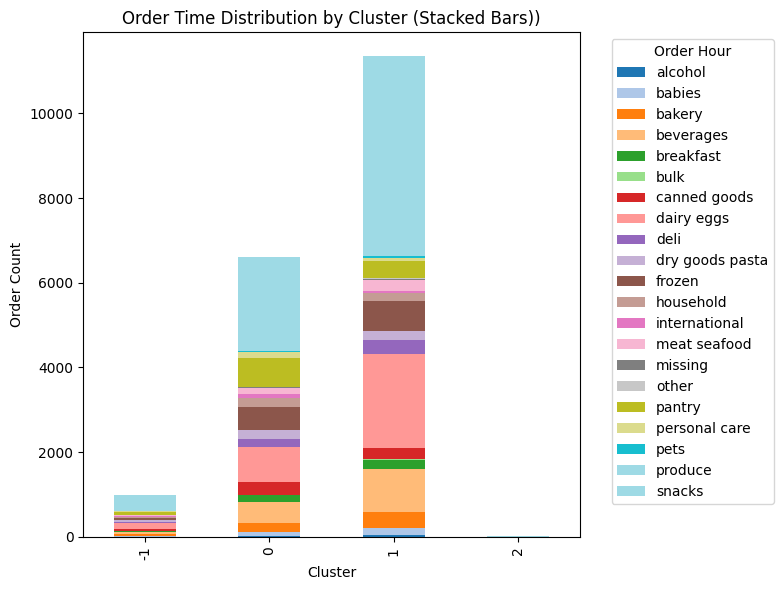

In [ ]:
pivot_table = pd.crosstab(df_sample['Cluster_DBSCAN'], df['department'])
pivot_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20')
plt.title('Order Time Distribution by Cluster (Stacked Bars))')
plt.xlabel('Cluster')
plt.ylabel('Order Count')
plt.legend(title='Order Hour', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

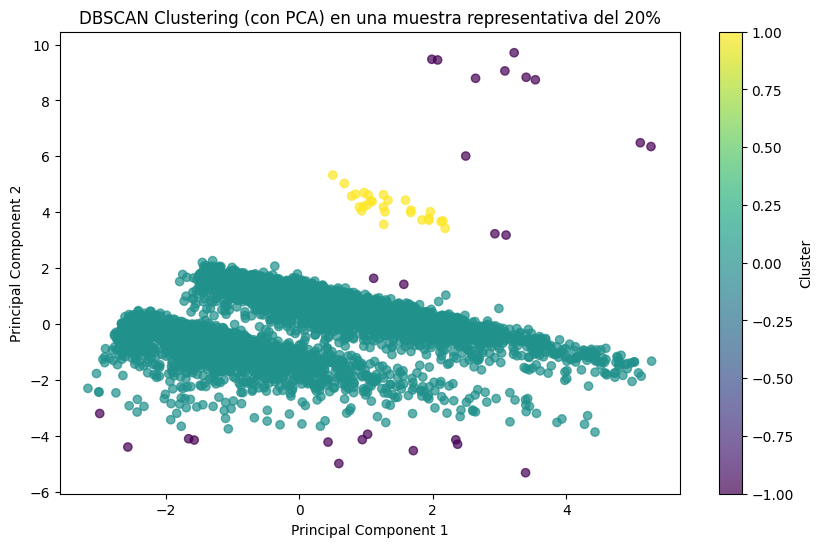

In [ ]:
pca = PCA(n_components=2)
X_pca_sample = pca.fit_transform(X_scaled_sample)

sample_X_pca = X_pca_sample[np.random.choice(X_pca_sample.shape[0], size=5000, replace=False)]

dbscan2 = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan2 = dbscan2.fit_predict(sample_X_pca)

df_dbscan2 = pd.DataFrame(sample_X_pca, columns=['PC1', 'PC2'])
df_dbscan2['Cluster'] = labels_dbscan2

plt.figure(figsize=(10, 6))
plt.scatter(df_dbscan2['PC1'], df_dbscan2['PC2'], c=df_dbscan2['Cluster'], cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering (con PCA) en una muestra representativa del 20%')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

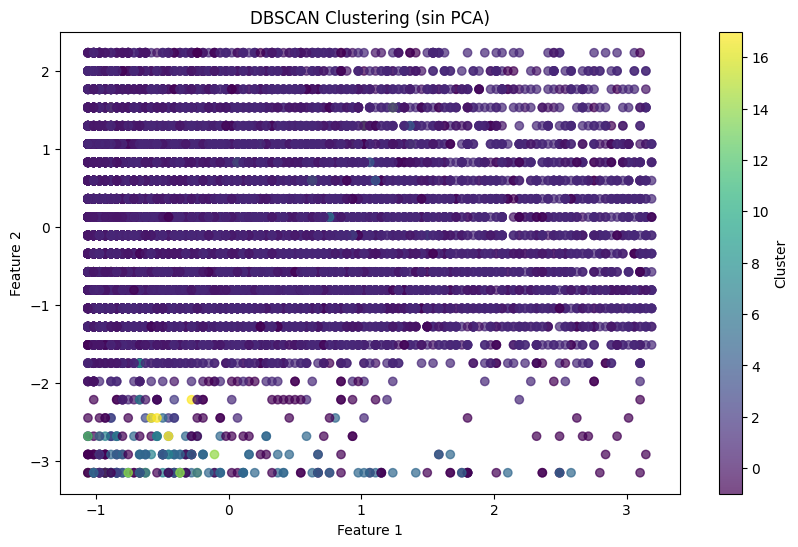

In [ ]:
X = df_sample[['max_order', 'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order', 'reordered']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan1 = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan1 = dbscan1.fit_predict(X_scaled)

df_dbscan1 = pd.DataFrame(X_scaled, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])
df_dbscan1['Cluster'] = labels_dbscan1

plt.figure(figsize=(10, 6))
plt.scatter(df_dbscan1['Feature1'], df_dbscan1['Feature2'], c=df_dbscan1['Cluster'], cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering (sin PCA)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

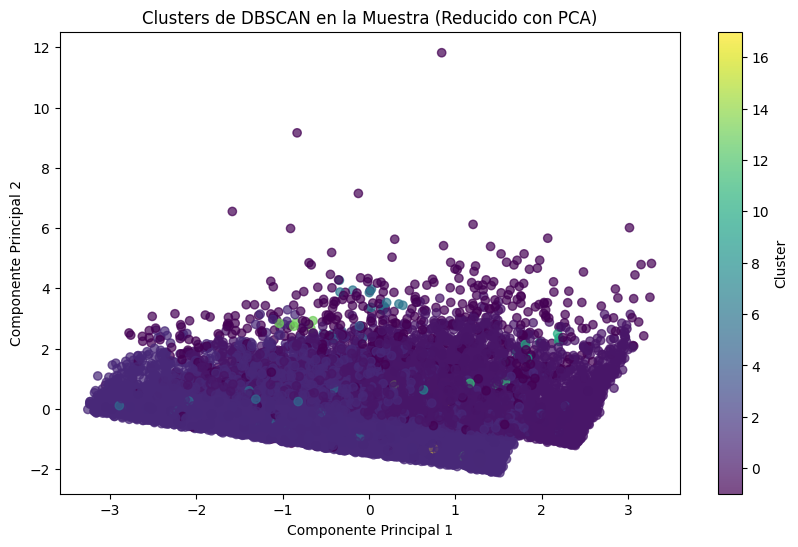

In [ ]:
df_sample = df.sample(frac=0.01, random_state=42)

X_sample = df_sample[['max_order', 'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order', 'reordered']]

scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

dbscan_sample = DBSCAN(eps=0.5, min_samples=5)
labels_sample = dbscan_sample.fit_predict(X_sample_scaled)

df_sample['Cluster_DBSCAN'] = labels_sample

pca = PCA(n_components=2)
X_sample_pca = pca.fit_transform(X_sample_scaled)

df_sample_pca = pd.DataFrame(X_sample_pca, columns=['PC1', 'PC2'])
df_sample_pca['Cluster'] = labels_sample

plt.figure(figsize=(10, 6))
plt.scatter(df_sample_pca['PC1'], df_sample_pca['PC2'], c=df_sample_pca['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Clusters de DBSCAN en la Muestra (Reducido con PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()